In [74]:
#importing the pertinent modules
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense , LSTM , Dropout


plt.style.use('fivethirtyeight')
warnings.filterwarnings('ignore')



In [75]:
#loading the dataset into a dataframe
file_path = r'C:\Users\Gregory Bazuaye\Downloads\MSFT.csv'
dataset = pd.read_csv(file_path)
dataset

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.061434,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.063628,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.064725,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.063079,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.061982,47894400
...,...,...,...,...,...,...,...
9078,2022-03-18,295.369995,301.000000,292.730011,300.429993,300.429993,43317000
9079,2022-03-21,298.890015,300.140015,294.899994,299.160004,299.160004,28351200
9080,2022-03-22,299.799988,305.000000,298.769989,304.059998,304.059998,27599700
9081,2022-03-23,300.510010,303.230011,297.720001,299.489990,299.489990,25715400


Text(0.5, 1.0, 'Annual Closing Price of Stock')

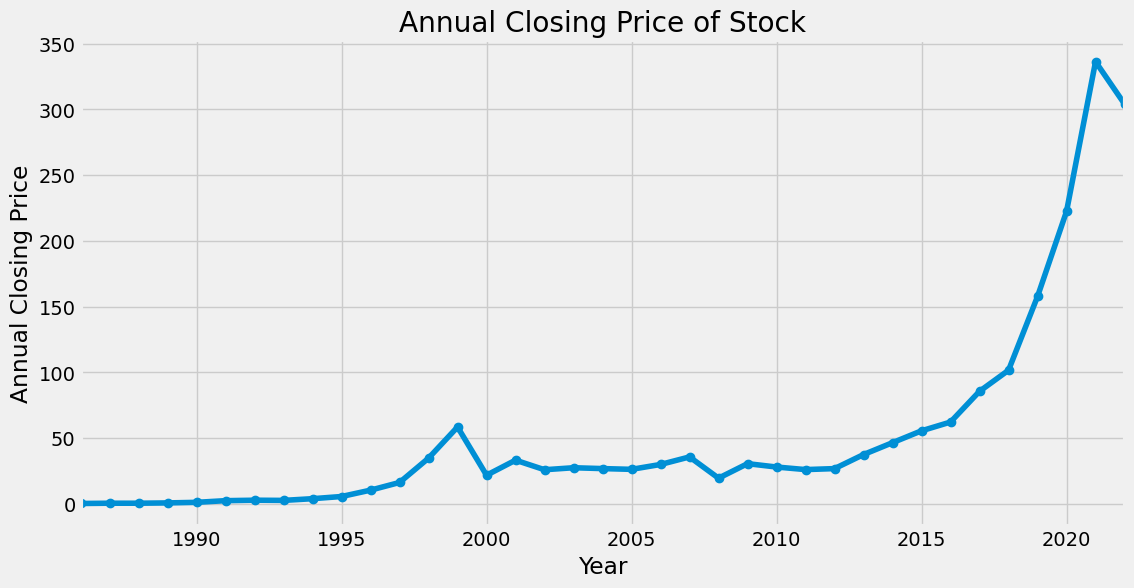

In [66]:


temp = dataset
temp['Date'] = pd.to_datetime(temp['Date'])
temp.index = temp['Date']  
temp.drop('Date', axis=1, inplace=True)  



fig, ax = plt.subplots(figsize=(12, 6))


annual.plot(ax=ax, marker='o')

# Set axis labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Annual Closing Price')
ax.set_title('Annual Closing Price of Stock')



In [ ]:
# the price of  the stock saw a significant increase between 2015 and 2020

### predicting the closing price of stock 

In [76]:
dataset['Date'] = pd.to_datetime(dataset['Date'])
dataset.set_index('Date' , inplace = True)
data = dataset[['Close']]

#Scaling the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)





In [77]:
sequence_length = 10  # Number of past days to consider for prediction
sequences = []
next_day_prices = []

for i in range(len(scaled_data) - sequence_length):
    sequences.append(scaled_data[i:i + sequence_length])
    next_day_prices.append(scaled_data[i + sequence_length])
    
x = np.array(sequences)
y = np.array(next_day_prices)

#split into train and test
train_size = int(0.8 * len(X))
x_train , x_test = x[train_size :] , x[: train_size]
y_train , y_test = y[train_size :] , y[: train_size]



#Building the model
model = Sequential()

model.add(LSTM(50, input_shape=(x_train.shape[1], x_train.shape[2]), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=100, batch_size=32)

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
y_test_actual = scaler.inverse_transform(y_test)

# Accuracy
rmse = np.sqrt(np.mean((predictions - y_test_actual) ** 2))
print(f'Root Mean Squared Error: {rmse}')




Epoch 1/100
57/57 [==============================] - 13s 22ms/step - loss: 0.0214
Epoch 2/100
57/57 [==============================] - 1s 20ms/step - loss: 6.1133e-04
Epoch 3/100
57/57 [==============================] - 1s 20ms/step - loss: 5.1331e-04
Epoch 4/100
57/57 [==============================] - 1s 21ms/step - loss: 4.8278e-04
Epoch 5/100
57/57 [==============================] - 1s 20ms/step - loss: 4.2506e-04
Epoch 6/100
57/57 [==============================] - 1s 22ms/step - loss: 4.0264e-04
Epoch 7/100
57/57 [==============================] - 1s 23ms/step - loss: 3.8235e-04
Epoch 8/100
57/57 [==============================] - 1s 22ms/step - loss: 3.9306e-04
Epoch 9/100
57/57 [==============================] - 1s 23ms/step - loss: 3.9811e-04
Epoch 10/100
57/57 [==============================] - 1s 24ms/step - loss: 4.0613e-04
Epoch 11/100
57/57 [==============================] - 2s 35ms/step - loss: 3.8335e-04
Epoch 12/100
57/57 [==============================] - 1s 24ms/step

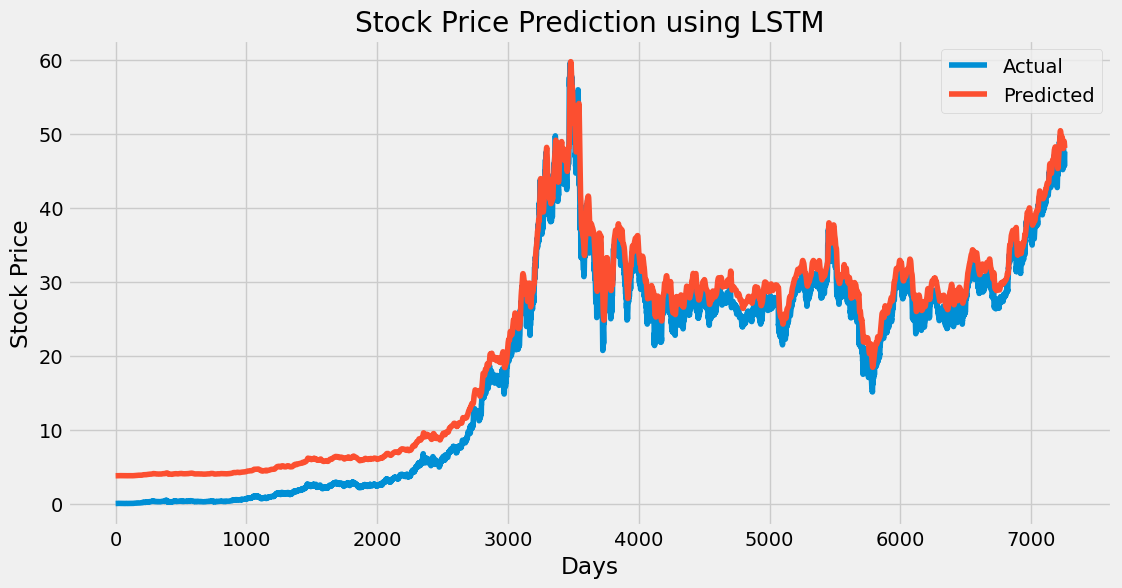

In [78]:
plt.figure(figsize=(12, 6))
plt.plot(y_test_actual, label='Actual')
plt.plot(predictions, label='Predicted')
plt.xlabel('Days')
plt.ylabel('Stock Price')
plt.title('Stock Price Prediction using LSTM')
plt.legend()
plt.show()



In [ ]:
#Here the discrepancies between the actual price and the predicted are conveyed visually 